<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [ ]:
import numpy as np

In [ ]:
print(np.float32(12.123452) - np.float32(12.123450))
valor_real = 0.000002

(12.123452/valor_real)*1/(2**31)

1.9073486e-06


0.002822711132466793

In [ ]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [ ]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [ ]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [ ]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [1]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt
def exponencial(x, N): #Calcula la serie con N términos
    r=0
    for i in range(N):
        r=np.add((((-1)**i)*(x**i))/factorial(i), r)
    return r




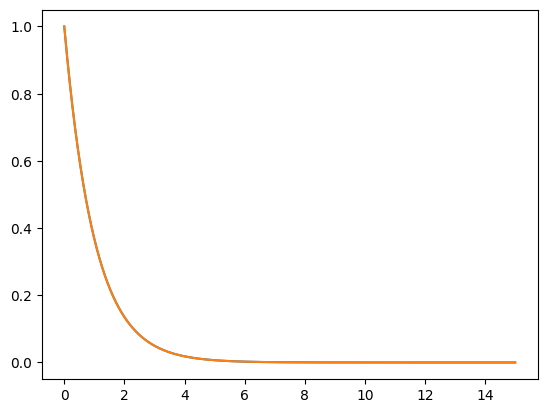

In [48]:
def exponencial_truncado(x, N):
    r=0
    tresh=1e-7
    for i in range(N):
        r=np.add((((-1)**i)*(x**i))/factorial(i), r)
        if abs((((-1)**i)*(x**i))/factorial(i+1)) <=abs(tresh*r):
            break
    return r

x=np.linspace(0, 15, 1000)
y=[]
for i in x:
    y.append(exponencial_truncado(i, 100))

plt.plot(x, np.exp(-x))
plt.plot(x, y)
plt.show()



In [10]:
print(exponencial(10, 9)-np.exp(-10))

1342.5872561873718


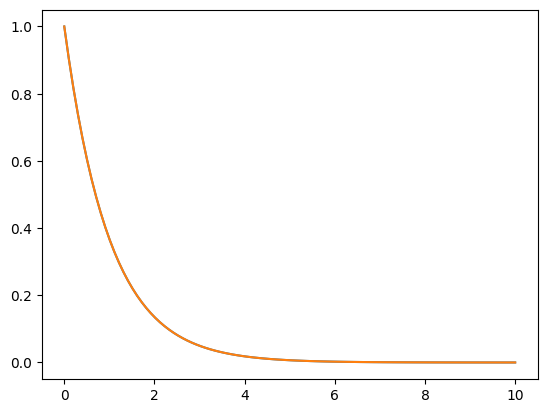

In [19]:
T=np.linspace(0, 10, 100)

def invertida(x,N):
    r=0
    for i in range(N):
        r=np.add(x**i/factorial(i), r)
    return 1/r
plt.plot(T, invertida(T, 100))
plt.plot(T, np.exp(-T))



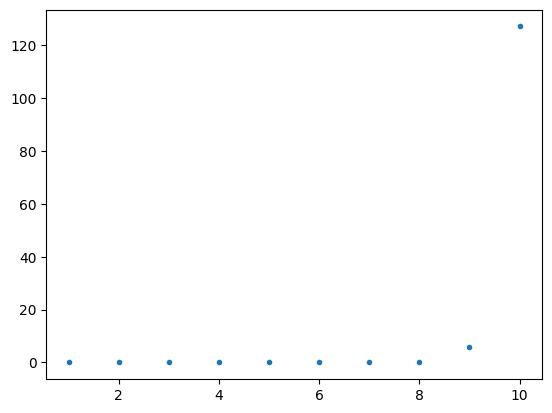

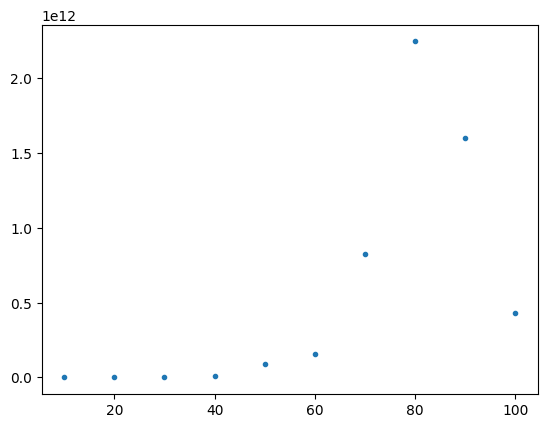

In [32]:
T1=np.arange(1, 11, 1)
T2=np.arange(10, 101, 10)
plt.plot(T1, abs(exponencial(T1, 100)-np.exp(-T1)), ".")
plt.show()
plt.plot(T2, abs(exponencial(T2, 100)-np.exp(-T2)), ".")
plt.show()

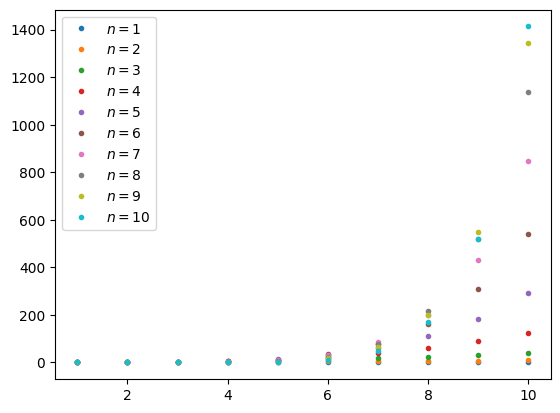

In [34]:
for i in T1:
    plt.plot(T1, abs(exponencial(T1, i)-np.exp(-T1)), ".", label=f"$n={i}$")
plt.legend()
plt.show()

## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




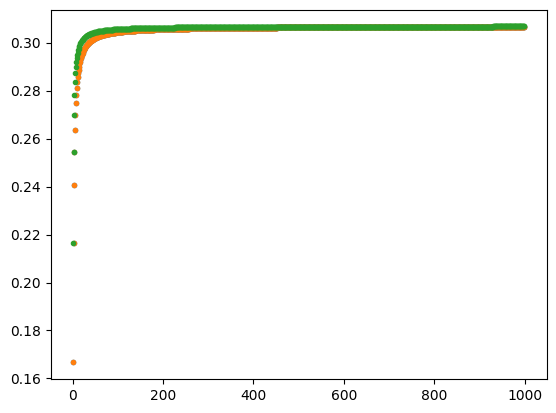

In [53]:
Sn1=lambda N: sum([((-1)**i)*(i/(i+1)) for i in range(1, 2*N+1)])
Sn2=lambda N: -sum([((2*i-1)/(2*i)) for i in range(1, N+1)]) + sum([(2*i)/(2*i+1) for i in range(1, N+1)])
Sn3=lambda N: sum([1/(2*i*(2*i+1)) for i in range(1, 2*N+1)])

N=np.arange(1, 1000, 1)
plt.plot(N, [Sn1(i) for i in N], ".")
plt.plot(N, [Sn2(i) for i in N], ".")
plt.plot(N, [Sn3(i) for i in N], ".")
# Parece que las tres sucesiones convergen a

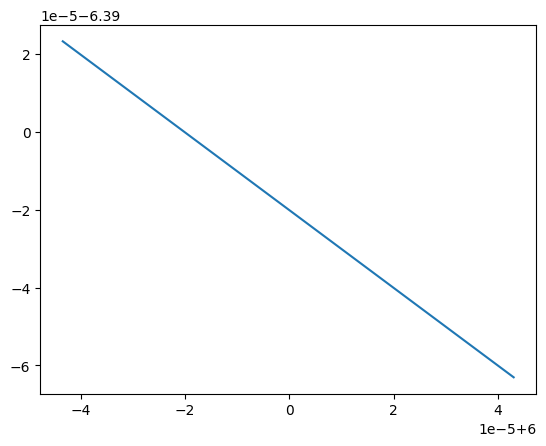

In [67]:
N=np.arange((1e6)-100, (1e6)+100, 1)
N = N.astype(int)

E1=[abs(Sn1(i)-Sn3(i))/Sn3(i) for i in N]


plt.plot(np.log10(N), np.log10(E1))


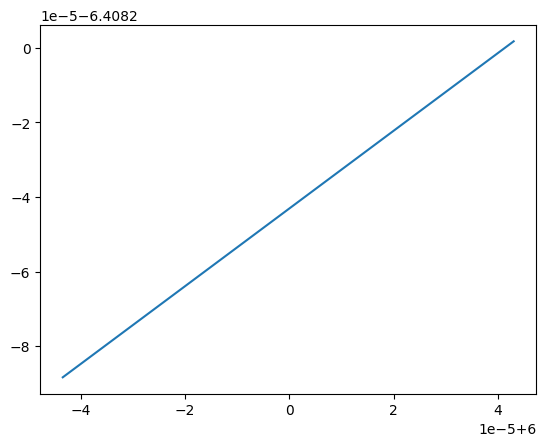

In [68]:
N=np.arange((1e6)-100, (1e6)+100, 1)
N = N.astype(int)

E2=[abs(Sn2(i)-Sn3(i))/Sn3(i) for i in N]


plt.plot(np.log10(N), np.log10(E2))